In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im = cv2.imread("blob.jpg", cv2.IMREAD_GRAYSCALE)
params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 10
params.maxThreshold = 200

params.filterByArea = True
params.minArea = 1500

params.filterByCircularity = True
params.minCircularity = 0.1

params.filterByConvexity = True
params.minConvexity = 0.87

params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
	detector = cv2.SimpleBlobDetector(params)
else : 
	detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs


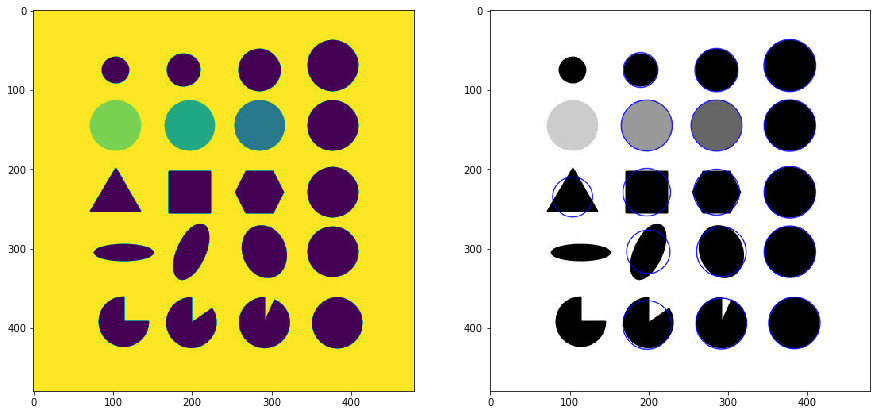

In [16]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].imshow(im)
ax[1].imshow(im_with_keypoints)


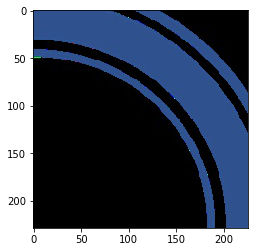

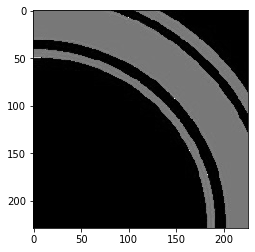

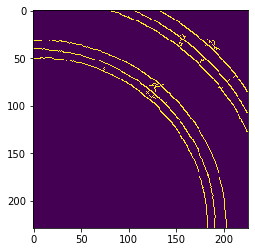

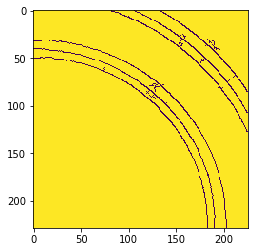

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\drawing.cpp:2515: error: (-215:Assertion failed) npoints > 0 in function 'cv::drawContours'


In [1]:
import cv2
import matplotlib.pyplot as plt

# 0
image = cv2.imread("1.jpg", cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow( image)
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow( gray,cmap="gray")
plt.show()

edge = cv2.Canny(gray, 5, 250)
plt.imshow( edge)
plt.show()


# 1
edge = cv2.bitwise_not(edge)
plt.imshow( edge)
plt.show()


contours = cv2.findContours(edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(edge, contours[0], -1, (0, 0, 0), 1)
plt.imshow( edge)
plt.show()


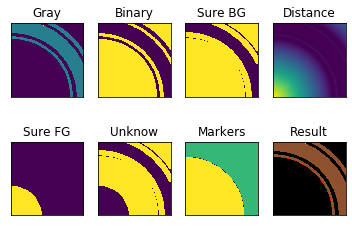

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# img = cv2.imread('images/watershed.jpg')
img = cv2.imread('1.jpg')

# binaray image로 변환
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#Morphology의 opening, closing을 통해서 노이즈나 Hole제거
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

# dilate를 통해서 확실한 Backgroud
sure_bg = cv2.dilate(opening,kernel,iterations=3)

#distance transform을 적용하면 중심으로 부터 Skeleton Image를 얻을 수 있음.
# 즉, 중심으로 부터 점점 옅어져 가는 영상.
# 그 결과에 thresh를 이용하여 확실한 FG를 파악
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)

# Background에서 Foregrand를 제외한 영역을 Unknow영역으로 파악
unknown = cv2.subtract(sure_bg, sure_fg)

# FG에 Labelling작업
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# watershed를 적용하고 경계 영역에 색지정
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]


images = [gray,thresh,sure_bg,  dist_transform, sure_fg, unknown, markers, img]
titles = ['Gray','Binary','Sure BG','Distance','Sure FG','Unknow','Markers','Result']

for i in range(len(images)):
    plt.subplot(2,4,i+1),plt.imshow(images[i]),plt.title(titles[i]),plt.xticks([]),plt.yticks([])

plt.show()

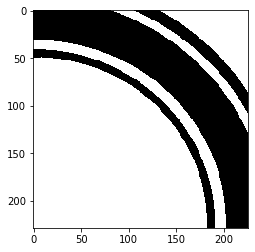

In [4]:
plt.imshow(thresh,cmap="gray")

In [5]:
ret, markers = cv2.connectedComponents(sure_fg)

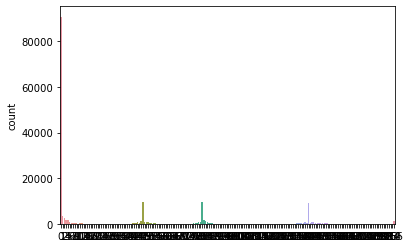

In [16]:
import seaborn as sns
sns.countplot(img.flatten())

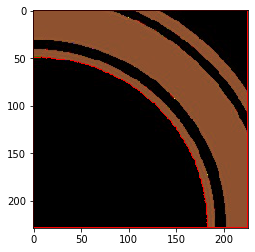

In [15]:
plt.imshow(img)

In [27]:
import cv2
from matplotlib import pyplot as plt
#from skimage import io                  # Only needed for web grabbing images, use cv2.imread for local images

# Read image from web; Attention: it's already RGB
img = cv2.imread('1.jpg')#io.imread('https://i.stack.imgur.com/J46nA.jpg')
#img = cv2.imread('J46nA.jpg')
# Convert to grayscale; Attention: Source is RGB from web grabbing
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# Use fixed threshold to mask black areas
_, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)

# Morphological closing to get whole particles; opening to get rid of noise
img_mop = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
img_mop = cv2.morphologyEx(img_mop, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15)))

# Find contours
_,cnts, _ = cv2.findContours(img_mop, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Get bounding rectangles for the scale and the particles
thr_size =2000
scale = [cv2.boundingRect(cnt) for cnt in cnts if cv2.contourArea(cnt) > thr_size]
particles = [cv2.boundingRect(cnt) for cnt in cnts if cv2.contourArea(cnt) < thr_size]

# Iterate all particles, add label and diameters to input image
for i, p in enumerate(particles):
    x = p[0]
    y = max(0, p[1]-10)
    d_h = p[2] / scale[0][2] * 500
    d_v = p[3] / scale[0][2] * 500
    cv2.putText(img, str(i), (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
    print('Particle ' + str(i) + ' | Horizontal diameter: ' + '{:.2f}'.format(d_h) +
          ' nm, vertical diameter: ' +  '{:.2f}'.format(d_v) + ' nm')

# cv2.waitKey(0)
# cv2.destroyAllWindows()

Particle 0 | Horizontal diameter: 40.98 nm, vertical diameter: 21.86 nm


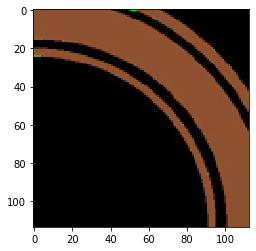

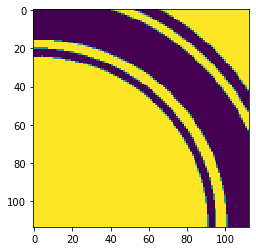

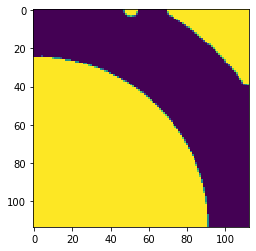

In [28]:
plt.imshow(cv2.resize(img, dsize=(0, 0), fx=0.5, fy=0.5))
plt.show()
plt.imshow( cv2.resize(thresh, dsize=(0, 0), fx=0.5, fy=0.5))
plt.show()
plt.imshow(  cv2.resize(img_mop, dsize=(0, 0), fx=0.5, fy=0.5))
plt.show()


In [24]:
images, contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
image = cv2.drawContours(img, contours, 0, 2)

plt.subplot(1, 2, 1)
plt.imshow(img_raw, cmap='bone')
plt.title("원본 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='bone')
plt.title("컨투어 이미지")
plt.axis('off')
plt.tight_layout()
plt.show()

[(0, 49, 183, 180), (140, 0, 86, 80)]

In [25]:
particles

[(95, 0, 15, 8)]